In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df= df.iloc[:,1:]

In [4]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [76]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [5]:
import matplotlib.pyplot as plt

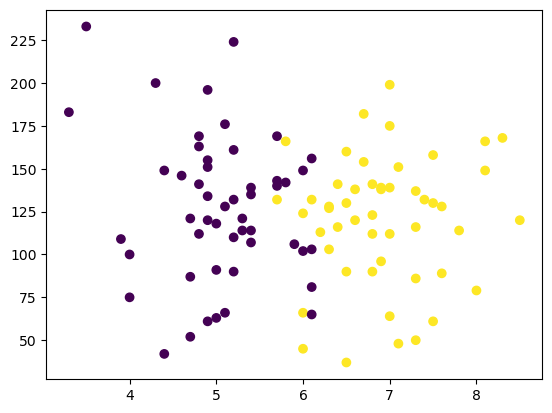

In [6]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


In [7]:
x= df.iloc[:,0:2] # independent variable
y= df.iloc[:,-1]  # dependent variable

In [10]:
from sklearn.model_selection import train_test_split  # train_test: to test  model..

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1)

In [11]:
from sklearn.preprocessing import StandardScaler  # to scale values..

In [12]:
scaler= StandardScaler()

In [14]:
x_train= scaler.fit_transform(x_train)


In [15]:
x_test= scaler.transform(x_test)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [16]:
x_test

array([[  7. , 199. ],
       [  4.8, 169. ],
       [  7.3, 116. ],
       [  7.5, 130. ],
       [  4.8, 163. ],
       [  5.9, 106. ],
       [  5.7, 140. ],
       [  7.3,  86. ],
       [  6. ,  66. ],
       [  7.5, 158. ]])

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf= LogisticRegression()

In [19]:
# model training:

clf.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred= clf.predict(x_test)  # prediction..

In [25]:
y_test

26    1
75    0
72    1
83    1
34    0
1     0
36    0
90    1
45    1
91    1
Name: placement, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score  # accuracy..

In [28]:
accuracy_score(y_test,y_pred)

0.6

In [ ]:
!pip install mlxtend

In [29]:
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

<AxesSubplot:>

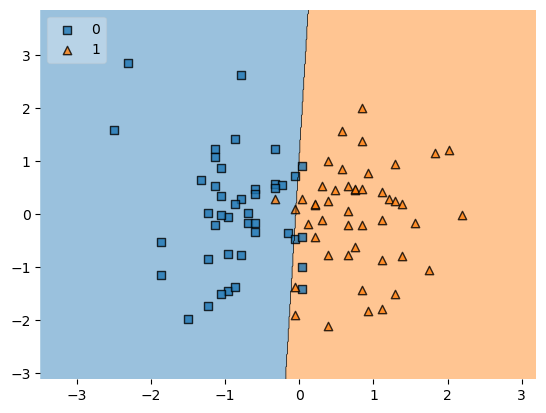

In [95]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [96]:
import pickle

In [97]:
pickle.dump(clf,open('model.pkl','wb'))